 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [535]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
from matplotlib.pyplot import figure

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [536]:
csvfile = Path("Resources/whale_returns.csv")

In [537]:
# Reading whale retuns
df = pd.read_csv(csvfile)

In [538]:
# Test data

df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [539]:
# Count nulls

df.count()

Date                           1060
SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [540]:
df.isnull()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,False,True,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1055,False,False,False,False,False
1056,False,False,False,False,False
1057,False,False,False,False,False
1058,False,False,False,False,False


In [541]:
df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [542]:
# Drop nulls
df1 = df.dropna().copy()
print(df1)

            Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
1     2015-03-03                  -0.001266           -0.004981   
2     2015-03-04                   0.002230            0.003241   
3     2015-03-05                   0.004016            0.004076   
4     2015-03-06                  -0.007905           -0.003574   
5     2015-03-09                   0.000582            0.004225   
...          ...                        ...                 ...   
1055  2019-04-25                  -0.000285           -0.001291   
1056  2019-04-26                   0.008149            0.009162   
1057  2019-04-29                   0.001254            0.002719   
1058  2019-04-30                  -0.001295           -0.002211   
1059  2019-05-01                  -0.005847           -0.001341   

      TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
1                       -0.000496               -0.006569  
2                       -0.002534                0.004213  
3              

In [543]:
df1.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [544]:
df1.tail()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
1059,2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [545]:
# Dropping extra Date column
df1.set_index(pd.to_datetime(df1['Date'], infer_datetime_format=True), inplace=True)
df1.drop(columns=['Date'], inplace=True)

In [546]:
df1.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [547]:
# Reading algorithmic returns

algo_returns = Path("Resources/algo_returns.csv")
algo = pd.read_csv(algo_returns)

In [548]:
# Count nulls

print(algo.count())
print()
print(algo.isnull())
print()
print(algo.isnull().sum())

Date      1241
Algo 1    1241
Algo 2    1235
dtype: int64

       Date  Algo 1  Algo 2
0     False   False    True
1     False   False    True
2     False   False    True
3     False   False    True
4     False   False    True
...     ...     ...     ...
1236  False   False   False
1237  False   False   False
1238  False   False   False
1239  False   False   False
1240  False   False   False

[1241 rows x 3 columns]

Date      0
Algo 1    0
Algo 2    6
dtype: int64


In [549]:
# Drop nulls
algo.dropna()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [550]:
algo.set_index(pd.to_datetime(algo['Date'], infer_datetime_format=True), inplace=True)
algo.drop(columns=['Date'], inplace=True)

In [551]:
algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [552]:
# Reading S&P TSX 60 Closing Prices

snp_tsx = Path("Resources/sp_tsx_history.csv")
snp = pd.read_csv(snp_tsx)

In [553]:
# Check Data Types

print(snp.dtypes)
print()
print(snp.head())

Date     object
Close    object
dtype: object

         Date       Close
0  1-Oct-2012  $12,370.19
1  2-Oct-2012  $12,391.23
2  3-Oct-2012  $12,359.47
3  4-Oct-2012  $12,447.68
4  5-Oct-2012  $12,418.99


In [554]:
# Fix Data Types) 
snp.head() 
print(snp.count())
print()

Date     1818
Close    1818
dtype: int64



In [555]:
snp["Close"] = snp["Close"].str.replace("$", "")
snp["Close"] = snp["Close"].str.replace(",", "")
snp["Close"] = snp["Close"].str.replace("%", "")
snp["Close"] = snp["Close"].astype(float)
snp["Close"].head(10)

C:\Users\antho\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0    12370.19
1    12391.23
2    12359.47
3    12447.68
4    12418.99
5    12273.57
6    12212.42
7    12233.95
8    12202.04
9    12229.96
Name: Close, dtype: float64

In [556]:
"""
Check Close dtype and print Head
"""
snp["Close"].dtype

dtype('float64')

In [557]:
snp.set_index(pd.to_datetime(snp['Date'], infer_datetime_format=True), inplace=True)
snp.head()

,Date,Close
Date,,
2012-10-01,1-Oct-2012,12370.19
2012-10-02,2-Oct-2012,12391.23
2012-10-03,3-Oct-2012,12359.47
2012-10-04,4-Oct-2012,12447.68
2012-10-05,5-Oct-2012,12418.99


In [558]:
# Drop double column
snp.drop(columns=['Date'], inplace=True)

In [559]:
print(snp.head())
print(snp.tail())

               Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99
               Close
Date                
2019-12-20  17118.44
2019-12-23  17128.71
2019-12-24  17180.15
2019-12-27  17168.21
2019-12-30  17098.56


In [560]:
snp.describe()

,Close
count,1818.000000
mean,14678.202233
std,1328.337613
min,11811.380000
25%,13621.362500
50%,14923.545000
75%,15629.085000
max,17180.150000


In [561]:
# Calculate Daily Returns
daily_return_snp = snp.pct_change()

<AxesSubplot:xlabel='Date'>

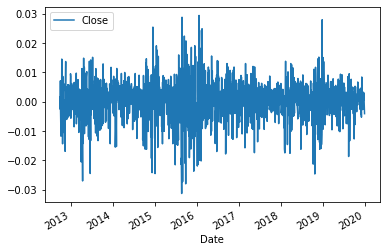

In [562]:
daily_return_snp.plot()

Text(0, 0.5, 'Price')

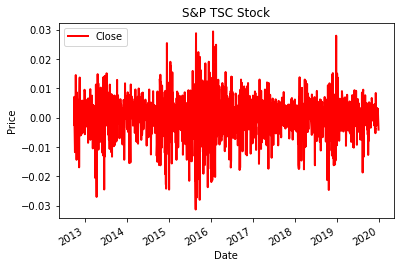

In [563]:
# Changed X & Y label
daily_return_snp1 = daily_return_snp
daily_return_snp1 = daily_return_snp.plot(lw=2, colormap='flag', markersize=10, title='S&P TSC Stock')
daily_return_snp1.set_ylabel("Price")

In [564]:
# Rename `Close` Column to be specific to this portfolio.
daily_return_snp.columns = ["S&P TSX"]
print(snp.head())

               Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [565]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a 
# single DataFrame with columns for each portfolio's returns.

new_df = [df1, algo, daily_return_snp]
combined_df = pd.concat(new_df)

In [566]:
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,NaN,NaN,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-12-20,NaN,NaN,NaN,NaN,NaN,NaN,0.003188
2019-12-23,NaN,NaN,NaN,NaN,NaN,NaN,0.000600
2019-12-24,NaN,NaN,NaN,NaN,NaN,NaN,0.003003


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All Stocks'}, xlabel='Date'>

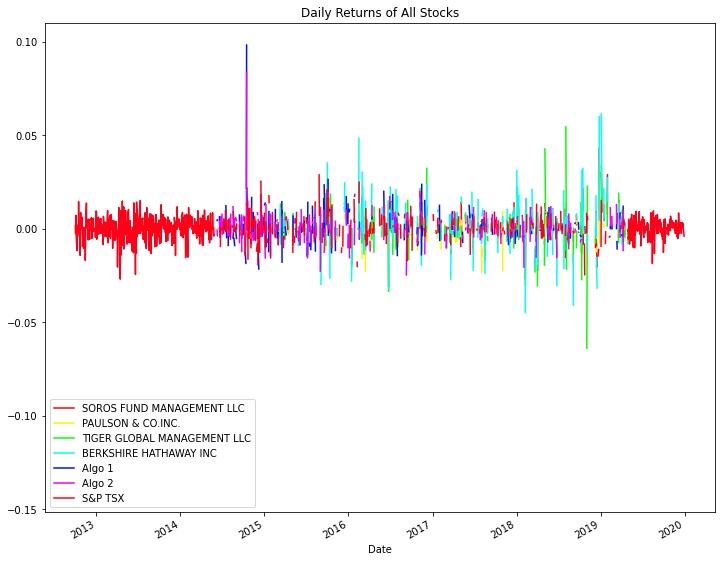

In [567]:
# Plot daily returns of all portfolios

combined_df.plot(figsize=(12, 10), title='Daily Returns of All Stocks', colormap='hsv')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of All Stocks'}, xlabel='Date'>

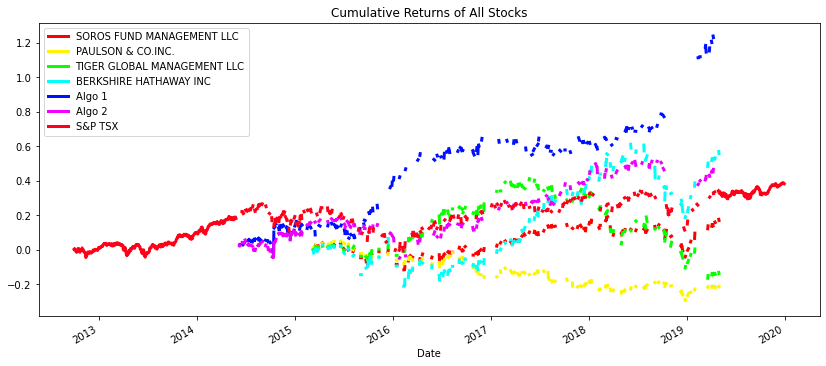

In [568]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod() -1

# Plot cumulative returns

cumulative_returns.plot(figsize=(14, 6), title='Cumulative Returns of All Stocks', colormap='hsv', linewidth=3)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


AxesSubplot(0.125,0.125;0.775x0.755)


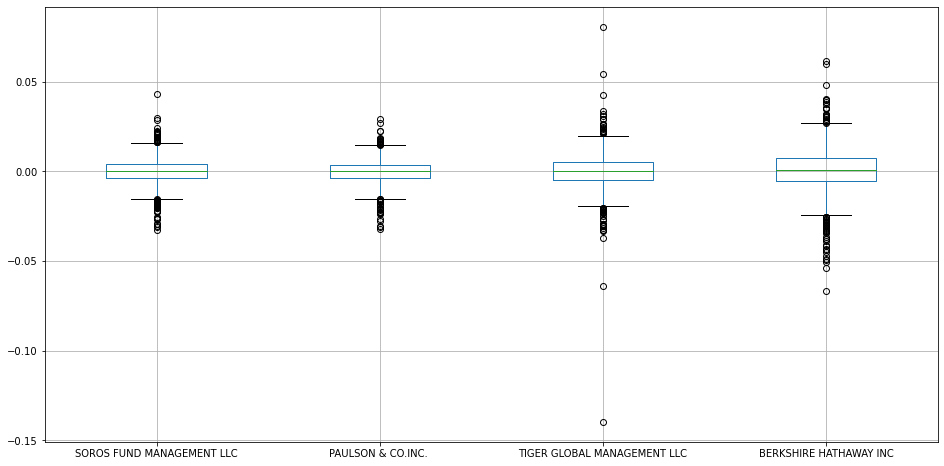

In [569]:
# Box plot to visually show risk
print(df1.boxplot(figsize=(16,8)))

AxesSubplot(0.125,0.125;0.775x0.755)


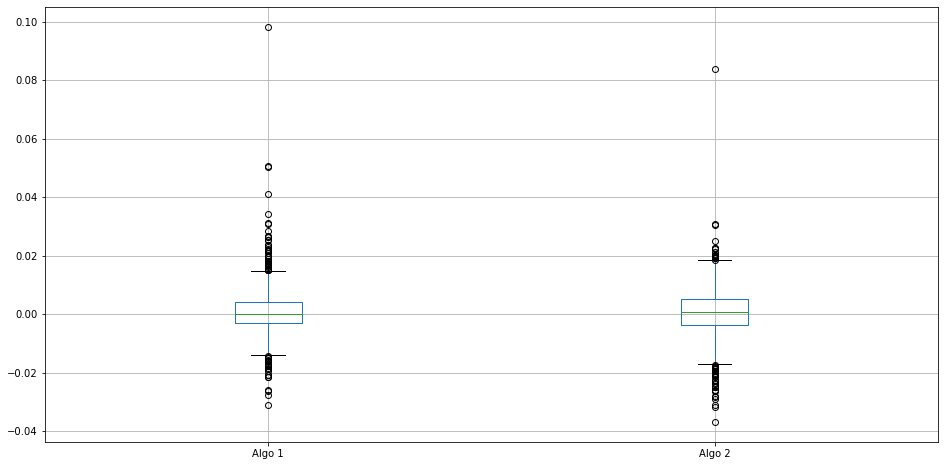

In [570]:
print(algo.boxplot(figsize=(16,8)))

AxesSubplot(0.125,0.125;0.775x0.755)


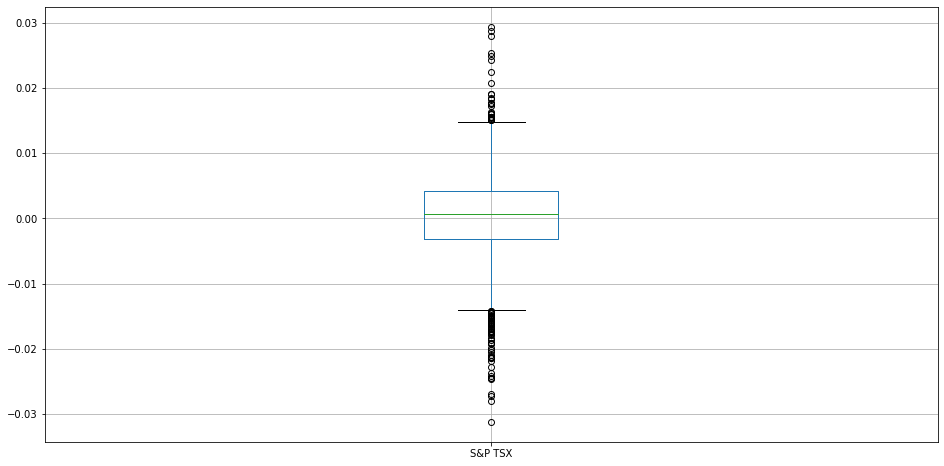

In [571]:
print(daily_return_snp.boxplot(figsize=(16,8)))

### Calculate Standard Deviations

In [572]:
# Calculate the daily standard deviations of all portfolios

combined_df_std = combined_df.std()
print(combined_df_std)

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007972
Algo 2                         0.008466
S&P TSX                        0.006637
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [573]:
# Calculate  the daily standard deviation of S&P TSX 60

daily_return_snp_std = daily_return_snp.std()
daily_return_snp_std.head()

S&P TSX    0.006637
dtype: float64

In [574]:
algo_std = algo.std()
algo_std.head()

Algo 1    0.007972
Algo 2    0.008466
dtype: float64

In [575]:
df1_std = df1.std()
df1_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [576]:
# Determine which portfolios are riskier than the S&P TSX 60

Sandp_TSX = 0.006637
Algo_1 = 0.007972
Algo_2 = 0.008466
Soros = 0.007842
Paulson = 0.006977
Tiger = 0.010824
Berkshire = 0.012831

print(f"----Which ASSET has the most risk compared to S&P TSX?----")
print()
if Algo_1 > Sandp_TSX:
    print(f"Algo_1 is riskier than SandP")
else:
    print(f"SandP is less riskier than Algo_1")
    
if Algo_2 > Sandp_TSX:
    print(f"Algo_2  is riskier than SandP")
else:
    if Algo_2 < Sandp_TSX:
        print(f"SandP is less riskier than Algo_2")
    
if Soros > Sandp_TSX:
    print(f"Soros  is riskier than SandP")
else:
    print(f"SandP is less riskier than Soros")

if Paulson > Sandp_TSX:
    print(f"Paulson  is riskier than SandP")
else:
    print(f"SandP is less riskier than Paulson ")
    
if Algo_2 > Sandp_TSX:
    print(f"Tiger  is riskier than SandP")
else:
    print(f"SandP is less riskier than Tiger ")
    
if Berkshire > Sandp_TSX:
    print(f"Berkshire is riskier than SandP")
else:
    print(f"Berkshire is less riskier than SandP")
    

----Which ASSET has the most risk compared to S&P TSX?----

Algo_1 is riskier than SandP
Algo_2  is riskier than SandP
Soros  is riskier than SandP
Paulson  is riskier than SandP
Tiger  is riskier than SandP
Berkshire is riskier than SandP


### Calculate the Annualized Standard Deviation

In [577]:
# Calculate the annualized standard deviation (252 trading days)

daily_return_snp_std_annual = daily_return_snp_std * np.sqrt(252)
algo_std_annual = algo_std * np.sqrt(252)
df1_std_annual = df1_std * np.sqrt(252)

print(f"---Annualized standard deviation - S&P TSX---")
print(daily_return_snp_std_annual)
print()
print(f"---Annualized standard deviation - Algo1 and Algo2---")
print(algo_std_annual)
print()
print(f"---Annualized standard deviation - Soros, Paulson, Tiger and Berkshire---")
print(df1_std_annual)

---Annualized standard deviation - S&P TSX---
S&P TSX    0.105365
dtype: float64

---Annualized standard deviation - Algo1 and Algo2---
Algo 1    0.126558
Algo 2    0.134401
dtype: float64

---Annualized standard deviation - Soros, Paulson, Tiger and Berkshire---
SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64


In [578]:
combined_df_std_annual = combined_df_std * np.sqrt(252)
print(combined_df_std_annual)

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
Algo 1                         0.126558
Algo 2                         0.134401
S&P TSX                        0.105365
dtype: float64


In [579]:
combined_df_std_annual.sort_index()

Algo 1                         0.126558
Algo 2                         0.134401
BERKSHIRE HATHAWAY INC         0.203682
PAULSON & CO.INC.              0.110754
S&P TSX                        0.105365
SOROS FUND MANAGEMENT LLC      0.124487
TIGER GLOBAL MANAGEMENT LLC    0.171830
dtype: float64

In [580]:
print(combined_df_std_annual)

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
Algo 1                         0.126558
Algo 2                         0.134401
S&P TSX                        0.105365
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [581]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_df.rolling(window=21).std().mean()

SOROS FUND MANAGEMENT LLC      0.007281
PAULSON & CO.INC.              0.006678
TIGER GLOBAL MANAGEMENT LLC    0.009757
BERKSHIRE HATHAWAY INC         0.011862
Algo 1                         0.007083
Algo 2                         0.007791
S&P TSX                        0.006107
dtype: float64

<AxesSubplot:xlabel='Date'>

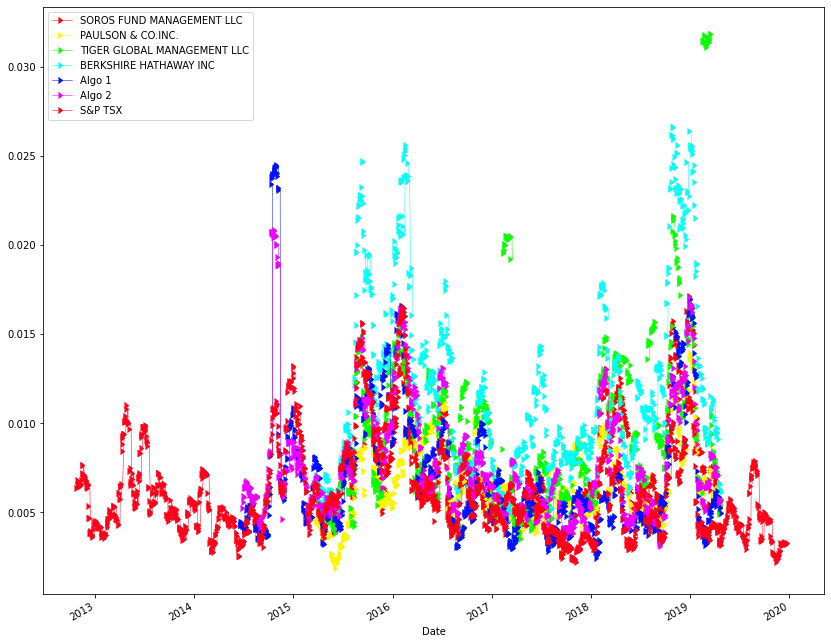

In [582]:
# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(14,12),colormap='hsv', marker=5,linewidth=0.5)

### Calculate and plot the correlation

In [583]:
# Calculate the correlation
price_correlation1 = combined_df.corr()

<AxesSubplot:>

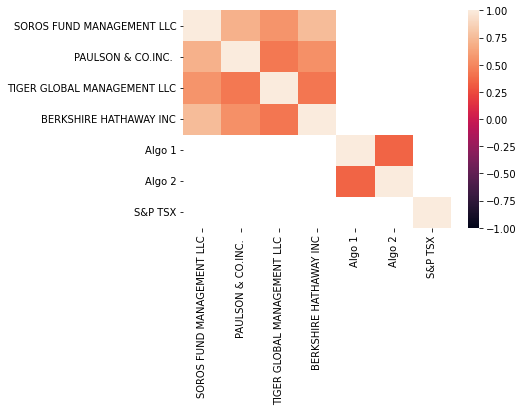

In [584]:
# Display de correlation matrix
sns.heatmap(price_correlation1, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [585]:
# Calculate covariance of a single portfolio
covariance = algo['Algo 1'].cov(daily_return_snp['S&P TSX'])

# Calculate variance of S&P TSX
variance = daily_return_snp['S&P TSX'].var()

# Computing beta
algo1_beta = covariance / variance
algo1_beta


0.4087773682216867

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Algo 1 Returns vs. S&P TSX Returns'}, xlabel='Date'>

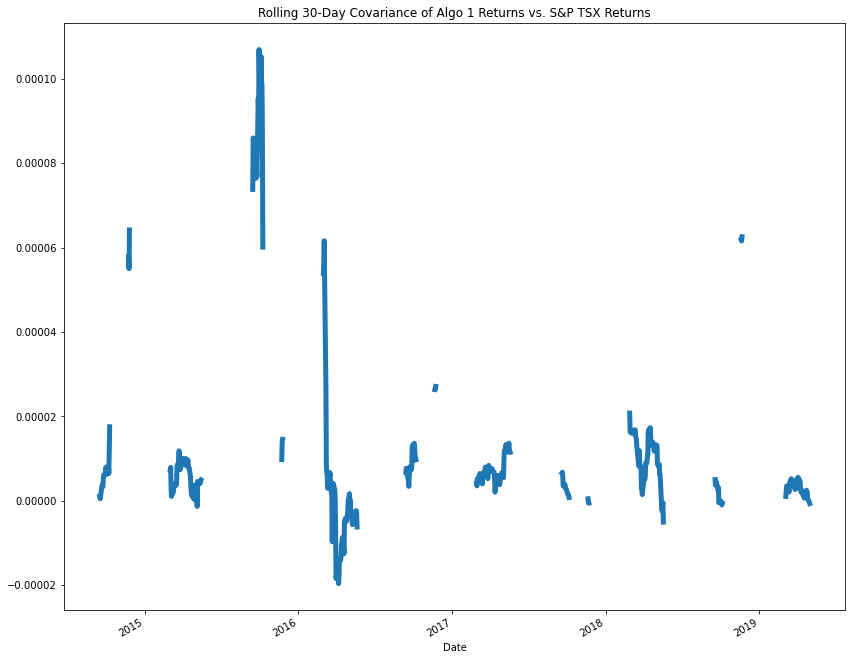

In [586]:
# Plot beta trend

rolling_covariance = algo['Algo 1'].rolling(window=30).cov(daily_return_snp['S&P TSX'])
rolling_covariance.plot(figsize=(14, 12), linewidth=5, title='Rolling 30-Day Covariance of Algo 1 Returns vs. S&P TSX Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [587]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [588]:
# Annualized Sharpe Ratios

""" df1, algo, daily_return_snp = combined_df """

sharpe_ratios = (combined_df.mean() * 252) / (combined_df_std * np.sqrt(252))
sharpe_ratios.head()

SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
Algo 1                         1.327397
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

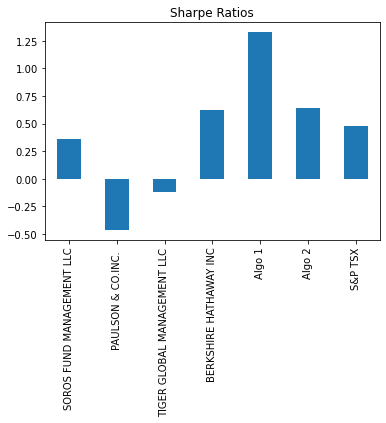

In [589]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Algo 1 has the highest sharp ration, and therefore is the best investment for returns as a good sharpe ratio is one that indicates a hgigh degree of expected return for a relatively low amount of risk. This is usually signalleed by a ratio greater than 1.0.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [590]:
# Reading data from 1st stock
TESLA = Path("Resources/TSLA.csv")
TESLA_df = pd.read_csv(TESLA)
TESLA_df

,Date,TESLA
0,25/01/2021,880.799988
1,26/01/2021,883.090027
2,27/01/2021,864.159973
3,28/01/2021,835.429993
4,29/01/2021,793.530029
...,...,...
248,18/01/2022,1030.510010
249,19/01/2022,995.650024
250,20/01/2022,996.270020
251,21/01/2022,943.900024


In [591]:
# Reading data from 2nd stock

AMD = Path("Resources/AMD.csv")
AMD_df = pd.read_csv(AMD)
AMD_df

,Date2,AMD
0,25/01/2021,94.129997
1,26/01/2021,94.709999
2,27/01/2021,88.839996
3,28/01/2021,87.519997
4,29/01/2021,85.639999
...,...,...
248,18/01/2022,131.929993
249,19/01/2022,128.270004
250,20/01/2022,121.889999
251,21/01/2022,118.809998


In [592]:
# Reading data from 3rd stock

TOYOTA = Path("Resources/TM.csv")
TOYOTA_df = pd.read_csv(TOYOTA)
TOYOTA_df

,Date1,TOYOTA
0,25/01/2021,146.720001
1,26/01/2021,145.979996
2,27/01/2021,142.639999
3,28/01/2021,143.300003
4,29/01/2021,140.520004
...,...,...
248,18/01/2022,207.470001
249,19/01/2022,202.419998
250,20/01/2022,201.470001
251,21/01/2022,199.770004


In [593]:
# Combine all stocks in a single DataFrame

new_df2 = [TESLA_df, AMD_df, TOYOTA_df]
megastocks = pd.concat((new_df2),axis=1,join='inner')
megastocks.head()

,Date,TESLA,Date2,AMD,Date1,TOYOTA
0,25/01/2021,880.799988,25/01/2021,94.129997,25/01/2021,146.720001
1,26/01/2021,883.090027,26/01/2021,94.709999,26/01/2021,145.979996
2,27/01/2021,864.159973,27/01/2021,88.839996,27/01/2021,142.639999
3,28/01/2021,835.429993,28/01/2021,87.519997,28/01/2021,143.300003
4,29/01/2021,793.530029,29/01/2021,85.639999,29/01/2021,140.520004


In [594]:
megastocks.drop(columns=['Date1','Date2'], inplace=True)

In [595]:
# Reset Date index
megastocks_1 = megastocks.set_index("Date")

In [596]:
megastocks_1.head()

,TESLA,AMD,TOYOTA
Date,,,
25/01/2021,880.799988,94.129997,146.720001
26/01/2021,883.090027,94.709999,145.979996
27/01/2021,864.159973,88.839996,142.639999
28/01/2021,835.429993,87.519997,143.300003
29/01/2021,793.530029,85.639999,140.520004


In [597]:
# Reorganize portfolio data by having a column per symbol
# not needed - solved

In [598]:
# drop nas
megastocks_1.dropna()
megastocks_1

,TESLA,AMD,TOYOTA
Date,,,
25/01/2021,880.799988,94.129997,146.720001
26/01/2021,883.090027,94.709999,145.979996
27/01/2021,864.159973,88.839996,142.639999
28/01/2021,835.429993,87.519997,143.300003
29/01/2021,793.530029,85.639999,140.520004
...,...,...,...
18/01/2022,1030.510010,131.929993,207.470001
19/01/2022,995.650024,128.270004,202.419998
20/01/2022,996.270020,121.889999,201.470001


In [599]:
megastocks_1.describe()

,TESLA,AMD,TOYOTA
count,253.000000,253.000000,253.000000
mean,793.692686,103.520079,171.576047
std,173.437143,24.489796,14.973668
min,563.000000,73.089996,140.410004
25%,668.059998,82.419998,155.380005
50%,730.909973,94.699997,176.570007
75%,899.940002,118.809998,181.360001
max,1229.910034,161.910004,211.369995


In [600]:
# Calculate daily returns
# Drop NAs

megastocks_daily_returns = megastocks_1.pct_change().dropna().copy()
megastocks_daily_returns.head()

,TESLA,AMD,TOYOTA
Date,,,
26/01/2021,0.002600,0.006162,-0.005044
27/01/2021,-0.021436,-0.061979,-0.022880
28/01/2021,-0.033246,-0.014858,0.004627
29/01/2021,-0.050154,-0.021481,-0.019400
1/02/2021,0.058322,0.023587,-0.000783


               TESLA       AMD    TOYOTA
Date                                    
26/01/2021  0.002600  0.006162 -0.005044
27/01/2021 -0.021436 -0.061979 -0.022880
28/01/2021 -0.033246 -0.014858  0.004627
29/01/2021 -0.050154 -0.021481 -0.019400
1/02/2021   0.058322  0.023587 -0.000783
...              ...       ...       ...
18/01/2022 -0.018197 -0.036163 -0.015283
19/01/2022 -0.033828 -0.027742 -0.024341
20/01/2022  0.000623 -0.049739 -0.004693
21/01/2022 -0.052566 -0.025269 -0.008438
24/01/2022 -0.014726 -0.019190 -0.010362

[252 rows x 3 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


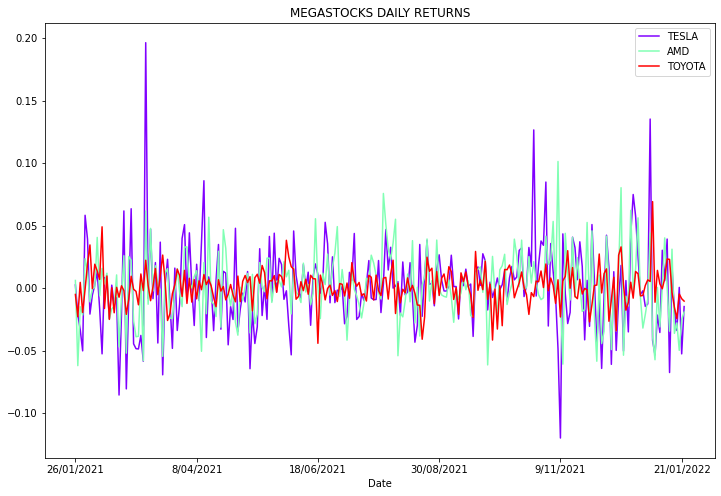

In [601]:
# Display sample data
print(megastocks_daily_returns)
print(megastocks_daily_returns.plot(colormap='rainbow', title="MEGASTOCKS DAILY RETURNS", figsize=(12,8)))

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [619]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

weighted_megastock_returns = megastocks_daily_returns.dot(weights)

# Display sample data
print(weighted_megastock_returns.head())

Date
26/01/2021    0.001239
27/01/2021   -0.035432
28/01/2021   -0.014492
29/01/2021   -0.030345
1/02/2021     0.027042
dtype: float64


In [603]:
weighted_megastock_returns.columns = ["Weighted Returns"]

AxesSubplot(0.125,0.125;0.775x0.755)


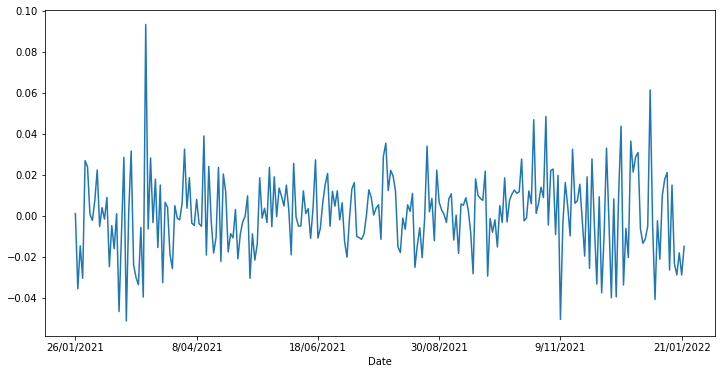

In [604]:
print(weighted_megastock_returns.plot(figsize=(12,6)))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [605]:
# Join your returns DataFrame to the original returns DataFrame

megastocks_all_returns = pd.concat([weighted_megastock_returns, megastocks_daily_returns],axis=1,join='inner')
megastocks_all_returns.columns = ["Weighted_Returns", "AMD", "TESLA", "TOYOTA"]
megastocks_all_returns.head()

,Weighted_Returns,AMD,TESLA,TOYOTA
Date,,,,
26/01/2021,0.001239,0.002600,0.006162,-0.005044
27/01/2021,-0.035432,-0.021436,-0.061979,-0.022880
28/01/2021,-0.014492,-0.033246,-0.014858,0.004627
29/01/2021,-0.030345,-0.050154,-0.021481,-0.019400
1/02/2021,0.027042,0.058322,0.023587,-0.000783


<AxesSubplot:xlabel='Date'>

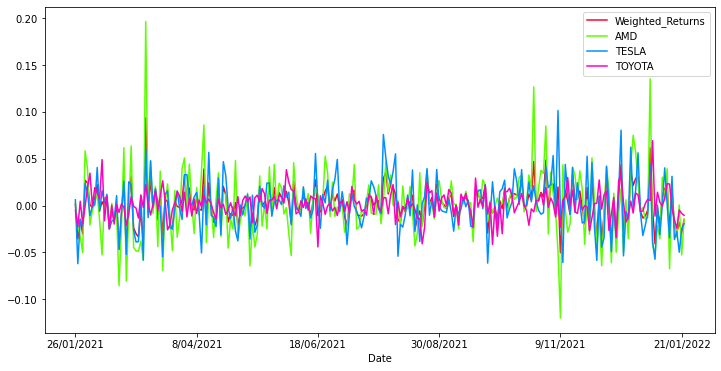

In [606]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

megastocks_all_returns.plot(figsize=(12,6),colormap='gist_rainbow')

In [638]:
megastocks_all_returns_2 = pd.concat([combined_df,megastocks_all_returns])

<AxesSubplot:xlabel='Date'>

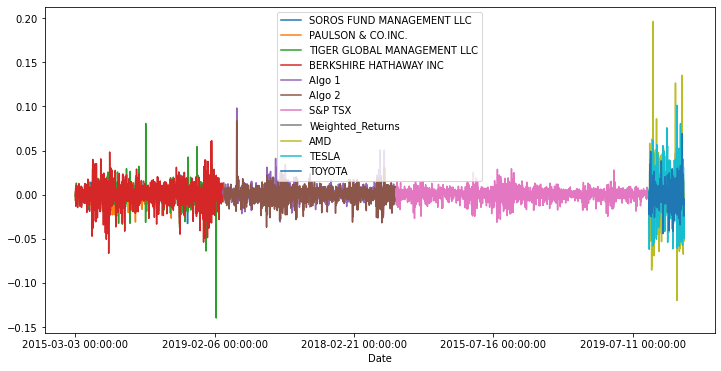

In [639]:
megastocks_all_returns_2.plot(figsize=(12,6))

In [640]:
megastocks_all_returns_2_2021_2022 = megastocks_all_returns_2['26/01/2021':'21/01/2022']

<AxesSubplot:xlabel='Date'>

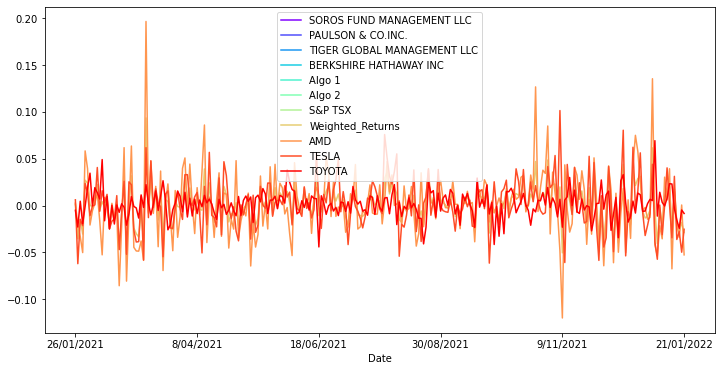

In [641]:
megastocks_all_returns_2_2021_2022.plot(figsize=(12,6),colormap='rainbow')

""" I understand that this data doesn't show the other portfolio has the stock data date does not line up """

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [608]:
# Calculate the annualized `std`

weighted_megastock_returns_std = weighted_megastock_returns * np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Megastock (AMD,TESLA,TOYOTA) Rolling STD'}, xlabel='Date'>

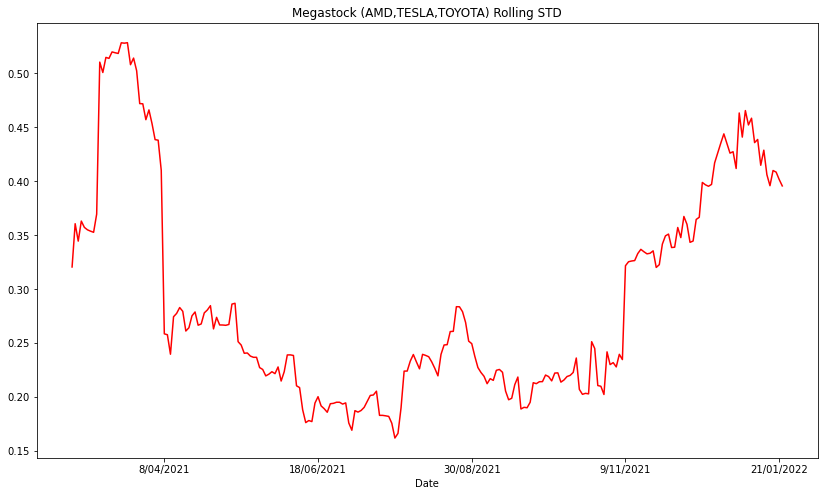

In [636]:
# Calculate rolling standard deviation

weighted_megastock_returns_std.rolling(window=21).std()

# Plot rolling standard deviation

weighted_megastock_returns_std.rolling(window=21).std().plot(figsize=(14,8),colormap='hsv',title='Megastock (AMD,TESLA,TOYOTA) Rolling STD')

### Calculate and plot the correlation

<AxesSubplot:>

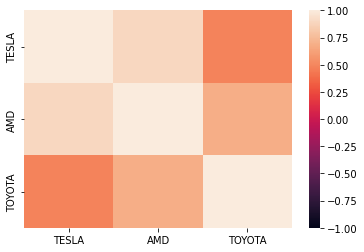

In [610]:
# Calculate and plot the correlation

weighted_megastock_returns_corr = megastocks_1.corr()
sns.heatmap(weighted_megastock_returns_corr, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [630]:
# Calculate and plot Beta

megastocks_covariance = megastocks_daily_returns['TESLA'].cov(daily_return_snp['S&P TSX'])
print(covariance)

# Calculate variance of S&P TSX
megastocks_variance = daily_return_snp['S&P TSX'].var()
print(variance)
# Computer Beta

megastocks_beta = megastocks_covariance / megastocks_variance
megastocks_beta

1.8008515969105594e-05
4.405458170898365e-05


nan

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of MSFT Returns vs. S&P 500 Returns'}, xlabel='Date'>

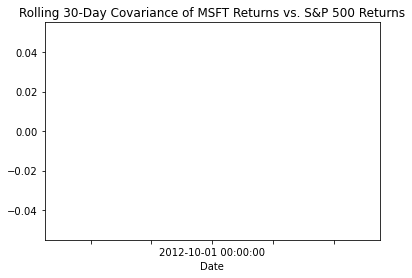

In [634]:
rolling_covariance_megastock = megastocks_daily_returns['TESLA'].rolling(window=30).cov(daily_return_snp['S&P TSX'])
rolling_covariance_megastock.plot(title='Rolling 30-Day Covariance of MSFT Returns vs. S&P 500 Returns')

""" This plot has failed because the stock data I chose does not line up with the stock data of S&P TSX"""

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [642]:
# Calculate Annualized Sharpe Ratios
megastocks_daily_returns_std = megastocks_daily_returns.std()

megastock_sharpe_ratio = (megastocks_daily_returns.mean() * 252) / (megastocks_daily_returns_std * np.sqrt(252))
megastock_sharpe_ratio.head()

TESLA     0.370937
AMD       0.706101
TOYOTA    1.417361
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


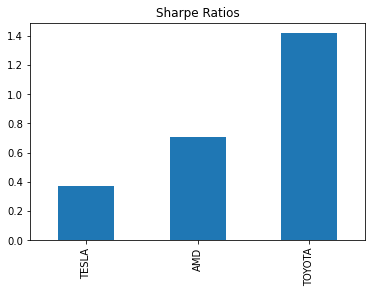

In [648]:
# Visualize the sharpe ratios as a bar plot

print(megastock_sharpe_ratio.plot.bar(title="Sharpe Ratios"))

AxesSubplot(0.125,0.125;0.775x0.755)


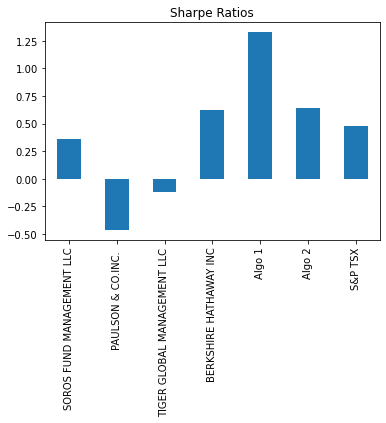

In [649]:
print(sharpe_ratios.plot.bar(title="Sharpe Ratios"))

### How does your portfolio do?

Write your answer here!

In [ ]:
""" My portfolio looks to have performed strongly in the last 2 years. This companies are strong and have great position 
in the market andit is reflected in the sharp ratios and also the daily return charts. Definitely companies that 
should have an eye kept on their stock data."""